# <img src="../Dashboards/python/assets/whisk_rox.png"> Whiskey on the Rocks

## "Spielwiese" für ML Modelle

### Foo

In [1]:
# Importe
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Das Mapping der Spaltennamen findet sich in <kbd>dd.py</kbd>

In [17]:
df_full = pd.read_csv("../Data/Sanitized/sessions.csv")
df_full['date'] = pd.to_datetime(df_full['date'], format="%Y-%m-%d")
df_full['cnv_rate'] = round(df_full['sess_co_done'] / df_full['sessions'], 3)
df_full.dtypes

sess_ctry                   object
sess_loc                    object
date                datetime64[ns]
sug_platform                object
landing_uri                 object
session_duration           float64
pages_per_sess             float64
jump_offs                    int64
sess_cart_add                int64
sess_co                      int64
sess_co_done                 int64
sessions                     int64
cnv_rate                   float64
dtype: object

In [18]:
df_full.head(11)

,sess_ctry,sess_loc,date,sug_platform,landing_uri,session_duration,pages_per_sess,jump_offs,sess_cart_add,sess_co,sess_co_done,sessions,cnv_rate
0,Germany,Nuremberg,2024-10-01,direct,https://www.whiskyquartier.de/pages/datenschutz,368.000000,5.000000,0,0,0,0,1,0.0
1,Germany,Munich,2024-10-01,direct,https://www.whiskyquartier.de/products/kavalan...,237.000000,7.000000,0,1,1,0,1,0.0
2,United Kingdom,London,2024-10-01,direct,https://www.whiskyquartier.de/password,0.000000,1.000000,1,0,0,0,1,0.0
3,Germany,Hausach,2024-10-01,direct,https://7bb991-55.myshopify.com/,0.000000,1.000000,1,0,0,0,1,0.0
4,Germany,Burgthann,2024-10-01,direct,https://7bb991-55.myshopify.com/,327.555556,1.888889,7,0,0,0,9,0.0
5,Germany,Nuremberg,2024-10-01,direct,https://7bb991-55.myshopify.com/?_ab=0&_fd=0&_...,579.666667,4.333333,1,0,0,0,3,0.0
6,Canada,NaN,2024-10-01,direct,https://www.whiskyquartier.de/password,0.000000,1.000000,1,0,0,0,1,0.0
7,Ukraine,Kyiv,2024-10-01,direct,https://www.whiskyquartier.de/password,0.000000,1.000000,1,0,0,0,1,0.0
8,Germany,Nuremberg,2024-10-01,direct,https://www.whiskyquartier.de/,4999.000000,14.666667,2,2,1,0,6,0.0
9,Germany,Nuremberg,2024-10-01,direct,https://www.whiskyquartier.de/password,776.000000,9.500000,0,0,0,0,2,0.0


In [12]:
df_full.loc[3]['date']

Timestamp('2024-10-01 00:00:00')

In [ ]:

[df_full['cnv_rate'].max(), df_full['cnv_rate'].min() ]

[np.float64(1.0), np.float64(0.0)]

### EDA - Spielereien

In [13]:
df_full.loc[:3]

,sess_ctry,sess_loc,date,sug_platform,landing_uri,session_duration,pages_per_sess,jump_offs,sess_cart_add,sess_co,sess_co_done,sessions
0,Germany,Nuremberg,2024-10-01,direct,https://www.whiskyquartier.de/pages/datenschutz,368.0,5.0,0,0,0,0,1
1,Germany,Munich,2024-10-01,direct,https://www.whiskyquartier.de/products/kavalan...,237.0,7.0,0,1,1,0,1
2,United Kingdom,London,2024-10-01,direct,https://www.whiskyquartier.de/password,0.0,1.0,1,0,0,0,1
3,Germany,Hausach,2024-10-01,direct,https://7bb991-55.myshopify.com/,0.0,1.0,1,0,0,0,1


In [21]:
agg = df_full.groupby(['date', 'sug_platform'])
agg['sessions'].sum()

date        sug_platform    
2024-10-01  alphabet             1
            direct              32
            good-apps            1
2024-11-01  7bb991-55            2
            alphabet            36
                                ..
2025-08-01  microsoft            1
            office               1
            shopify              7
            syndicatedsearch     4
            whiskybase          50
Name: sessions, Length: 67, dtype: int64

#### Grafische Analyse

<Axes: xlabel='date', ylabel='sessions'>

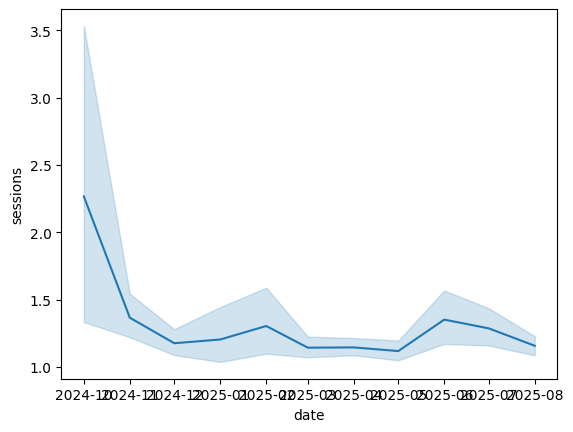

In [14]:
sns.lineplot(df_full, x="date", y="sessions")

#### Foo